# Before you start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [165]:
# Import your libraries
from scipy import stats
import pandas as pd
from math import sqrt
import numpy as np
import matplotlib.pyplot as plt

# Challenge 1 - Generate and Plot Normal Distributions

#### Step 1: Generate samples and test normal distribution

Use mean=50, standard_deviation=5, and sample_size=[10, 50, 500, 5000] to generate 4 random samples that are normally distributed. Test your normal distributions with [`scipy.stats.normaltest`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html).


*Hint: Read the documentation for `scipy.stats.normaltest`. The function does not simply return Yes or No for whether your data is normal distribution. It returns the likelihood.*

In [166]:
# Your code here
mu, sigma = 50, 5

sample_size = pd.Series([10, 50, 500, 5000])

dists = sample_size.apply(lambda x: np.random.normal(mu, sigma, x))

tests = dists.apply(lambda x: stats.normaltest(x))

tests

/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


0      (1.7368323124206708, 0.41961562881741277)
1     (0.009938820805642163, 0.9950429166891418)
2       (0.4620407372153025, 0.7937232988321341)
3    (13.572950229748194, 0.0011289411568573384)
dtype: object

#### Interpret the normaltest results and make your observations.

# Explain the test results here
The first return of the Normaltest:
*statistic : float or array
s^2 + k^2, where s is the z-score returned by skewtest and k is the z-score returned by kurtosistest.*
Skewtest:

If skewness is less than -1 or greater than 1, the distribution is highly skewed.

If skewness is between -1 and -0.5 or between 0.5 and 1, the distribution is moderately skewed.

If skewness is between -0.5 and 0.5, the distribution is approximately symmetric.

And Kurtosistest:

High value of k means that the bell has a central peak, negative values of k means that it has a spreaded bell.

*pvalue : float or array
A 2-sided chi squared probability for the hypothesis test.*

High values means that it's more normal distributed in mu and sigma.


#### Step 2: Plot normal distributions

Use matplotlib to plot a histogram of each sample. 

*Hints:*

- Your outputs should look like below:

![normal distributions with different sample sizes](ch-1.png)

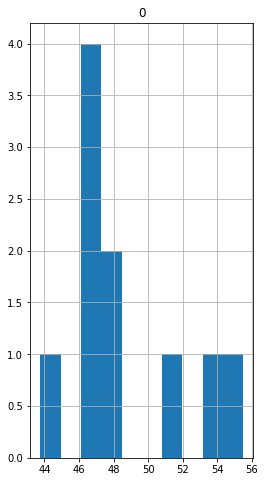

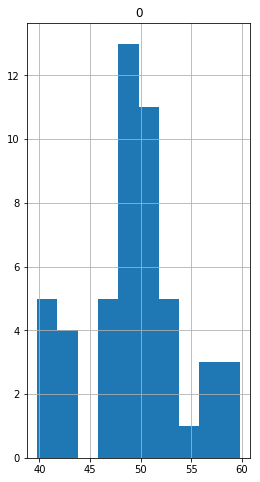

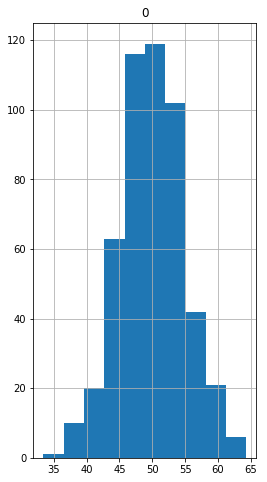

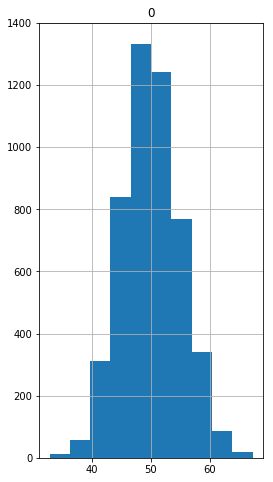

In [167]:
# Your code here
for i in range(4):
    pd.DataFrame(dists[i]).hist(figsize=(4,8))

#### Compare the distributions above. What do you observe? Explain with the Central Limit Theorem.

When sample_population is higher, the plot is more likely to be similar to theorical normal plot

# Challenge 2 - Plot Probability Mass Function (PMF)

#### Background knowledge

[PF](https://en.wikipedia.org/wiki/Probability_mass_function) shows the probability distribution of a **discrete random variable**. A [discrete random variable](https://en.wikipedia.org/wiki/Random_variable#Discrete_random_variable) has random numeric values that are not continuous. For example, the number of people in a household can only be integers but not floats. Therefore the number of people in a household is a discrete variable.

#### Question: We assume that the probability of clicking an Ad in a Youtube video is 0.15. We have a sample of 5 people who wathched the video and we want to plot the PMF for a binomial distribution.

*Hint: use binom from `scipy.stats.binom`. Your output should look like below:*

![binom 10](ch-2.png)

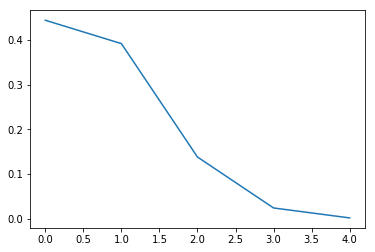

In [168]:
# Your code here
from scipy.stats import binom

n, p = 5, 0.15

x = range(n)

dist = binom(n, p)

fig, ax = plt.subplots(1, 1)

plt.plot(x, dist.pmf(x))

plt.show()

#### Explain what you observe from the plot above

In [169]:
# Your comment here
#The probability of watching the ad is going down when less people still needs to watch the video

#### Now plot PMP with 50, 500, and 5000 visitors.

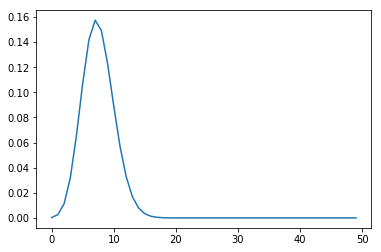

In [170]:
# Your code here
n, p = 50, 0.15

x = range(n)

dist = binom(n, p)

fig, ax = plt.subplots(1, 1)

plt.plot(x, dist.pmf(x))

plt.show()

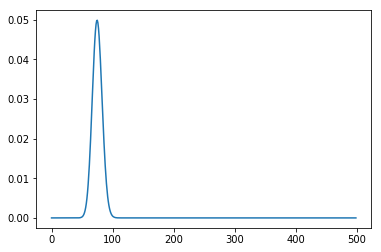

In [171]:
n, p = 500, 0.15

x = range(n)

dist = binom(n, p)

fig, ax = plt.subplots(1, 1)

plt.plot(x, dist.pmf(x))

plt.show()

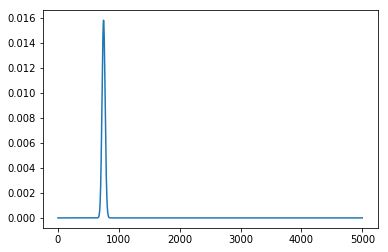

In [172]:
n, p = 5000, 0.15

x = range(n)

dist = binom(n, p)

fig, ax = plt.subplots(1, 1)

plt.plot(x, dist.pmf(x))

plt.show()

#### What did you notice from the distribution plots? Comment your findings.

In [173]:
# Your comment here
#When n is higher the spike is less spreaded

# Challenge 3

#### Reaserch the Poisson distribution. Write about your own understanding of the Poisson distribution.

In [174]:
# Your comment here
#Expresses the probability of a given number of events occurring in a fixed interval of time or space if these events occur with a known constant rate and independently of the time since the last event

#### A website has an average of 300 visits per day. What is the probability of getting 320 visitors in a day?

*Hint: use `scipy.stats.poisson`*

In [175]:
# Your code here
mu = 300
stats.poisson.pmf(320,mu)

0.011612348610402475

#### What is the probability of getting 60 visits?

In [176]:
# Your code here
stats.poisson.pmf(60,mu)

2.622743762294515e-64

#### Plot the distribution of the probability for getting 0-1000 visits.

*Hints:* 

- Create a list to store the Poisson distribution probabilities for n=0 to 1000. Then plot the probabilities.

- Your plot should look like below:

![poisson distribution](ch-3.png)

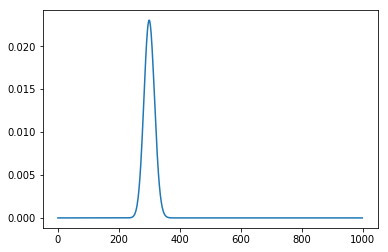

In [177]:
# your code here
from scipy.stats import poisson

N = np.arange(1000)

rv = poisson(300)

arr = []

for n in N:
    arr.append(rv.pmf(n))

plt.plot(arr)

# Challenge 4 - Central Limit Theorem

#### Example of application

A delivery company needs 35 minutes to deliver a package, with a standard deviation of 8 minutes. Suppose that in one day, they deliver 200 packages.

#### a. What is the probability that the mean delivery time today is between 30 and 35 minutes?

In [178]:
# Your answer here
print(0.5 - stats.norm.cdf(30, 35, 8/sqrt(200)))

0.5


#### b. What is the probablity that in total, it takes more than 115 hours to deliver all 200 packages?

In [ ]:
# Your answer here

# Challenge 5 - Normal Variables 

The value (in thousands) of the monthly sales of a publishing company follows a normal distribution with a mean equal to 200 and a standard deviation equal to 40. 
X → N(200,40)
#### 1. Find the probability that the monthly sales are more than 300. 

In [179]:
# Your answer here
print(1 - stats.norm.cdf(300, 200, 40))

0.006209665325776159


#### 2. Find the probability that the monthly sales fall between 160 and 240.

In [180]:
# Your answer here
print(stats.norm.cdf(240, 200, 40) - stats.norm.cdf(160, 200, 40))

0.6826894921370859


#### 3. Find the probability that the monthly sales do not exceed 150.

In [181]:
# Your answer here
print(stats.norm.cdf(150, 200, 40))

0.10564977366685535


#### 4. Find the probability that the monthly sales exceed 3000. 

In [182]:
# Your answer here
print(1 - stats.norm.cdf(3000, 200, 40))

0.0


# Challenge 6 - Poisson distribution
The mean number of violent robberies per month that are registered in a particular barrio is 4. Find the following probabilities.
#### 1.The probability that in a particular month there is no violent robbery.

In [183]:
#Your answer here
stats.poisson.cdf(0,4)

0.018315638888734182

#### 2. The probability that there are at least 1 in a given month. 

In [184]:
#Your answer here
stats.poisson.cdf(1,4)

0.0915781944436709

#### 3. The probability that there are between 2 and 6 (inclusive) in a given month.

In [185]:
# Your answer here
stats.poisson.cdf(6,4) - stats.poisson.cdf(2,4)

0.6512227160438819

#### 4. The probability that there more than two in 15 days.  

In [186]:
# Your answer here
1 - stats.poisson.cdf(2,4/2)

0.3233235838169366